In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("decision_tree_fit_prediction_dataset.csv")
display(df.shape)
display(df.head())
display(df.info())
display(df.describe())

(15000, 10)

,max_depth,min_samples_split,min_samples_leaf,criterion,n_samples,n_features,n_informative,class_sep,n_classes,label
0,3,2,5,entropy,1742,12,9,0.580,102,underfit
1,15,7,2,gini,9893,13,5,0.883,7,overfit
2,8,10,1,entropy,4543,14,6,1.970,30,overfit
3,-1,2,2,gini,8013,19,2,1.071,2,overfit
4,10,10,3,gini,984,16,4,1.505,6,normalfit


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   max_depth          15000 non-null  int64  
 1   min_samples_split  15000 non-null  int64  
 2   min_samples_leaf   15000 non-null  int64  
 3   criterion          15000 non-null  object 
 4   n_samples          15000 non-null  int64  
 5   n_features         15000 non-null  int64  
 6   n_informative      15000 non-null  int64  
 7   class_sep          15000 non-null  float64
 8   n_classes          15000 non-null  int64  
 9   label              15000 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 1.1+ MB


None

,max_depth,min_samples_split,min_samples_leaf,n_samples,n_features,n_informative,class_sep,n_classes
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7.733933,6.000333,2.971533,5051.817800,12.539933,5.361733,1.249744,57.412067
std,6.602498,2.572776,1.416400,2856.555293,4.622261,2.492595,0.430432,109.493109
min,-1.000000,2.000000,1.000000,100.000000,5.000000,2.000000,0.500000,2.000000
25%,2.000000,4.000000,2.000000,2583.000000,9.000000,3.000000,0.880750,4.000000
50%,5.000000,6.000000,3.000000,5057.000000,13.000000,5.000000,1.254000,13.000000
75%,10.000000,8.000000,4.000000,7517.000000,17.000000,7.000000,1.623000,54.000000
max,20.000000,10.000000,5.000000,10000.000000,20.000000,10.000000,2.000000,962.000000


In [3]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}\n")

max_depth: [ 3 15  8 -1 10  5 20  2]

min_samples_split: [ 2  7 10  8  3  5  9  6  4]

min_samples_leaf: [5 2 1 3 4]

criterion: ['entropy' 'gini' 'log_loss']

n_samples: [1742 9893 4543 ... 4211 2432 4914]

n_features: [12 13 14 19 16 10 11 15  8 20  7  6 18  9 17  5]

n_informative: [ 9  5  6  2  4  8 10  3  7]

class_sep: [0.58  0.883 1.97  ... 0.776 0.605 1.988]

n_classes: [102   7  30   2   6   3 124  50 107 253   8   5  24  17 108 308 421 146
  13   4  26  32  14 427 185  18  11  89  20  47  10  44 122  62  12  29
  16  15 766 358   9 112  25  22  41 113  31  23  34  96 220  19  87 399
  27 139  56  35  42 643  46 200 408  97  84 111  28 633  54  73  21  83
 247  55  52  33  90 138 246 196 119 115 136 680 379  45 503 128 117  48
 825  95 169  58 350 232  63 103 210  81  74 345  77 477 456 369 130  94
  36  37 116 244  78 226 105 216 266  51 167 436  75  39  85  60 630 359
  57  88 234  93 215  76 243  79  64 166 290 855  38 311  49 104  70 519
 374 325 289 164  65  98 288 305 59

In [4]:
df["label"] = df["label"].map({"underfit": 0, "normalfit": 1, "overfit": 2})

In [5]:
df = pd.get_dummies(df)
df.head()

,max_depth,min_samples_split,min_samples_leaf,n_samples,n_features,n_informative,class_sep,n_classes,label,criterion_entropy,criterion_gini,criterion_log_loss
0,3,2,5,1742,12,9,0.580,102,0,True,False,False
1,15,7,2,9893,13,5,0.883,7,2,False,True,False
2,8,10,1,4543,14,6,1.970,30,2,True,False,False
3,-1,2,2,8013,19,2,1.071,2,2,False,True,False
4,10,10,3,984,16,4,1.505,6,1,False,True,False


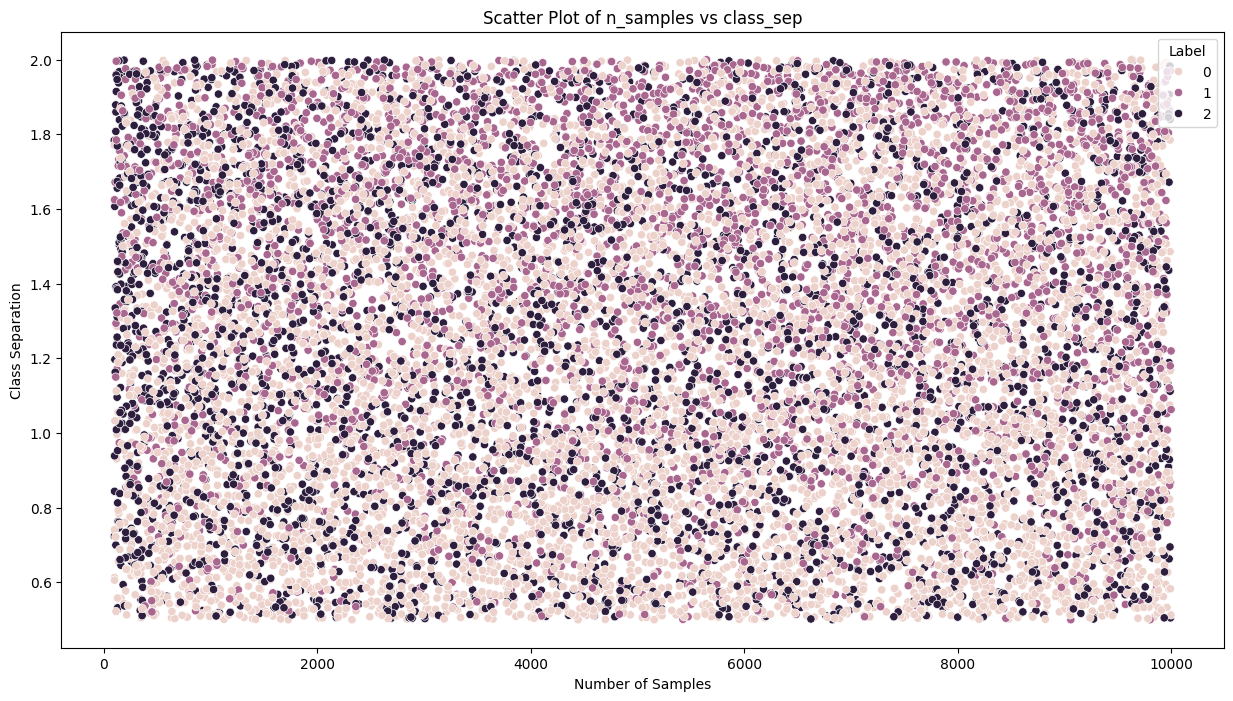

In [6]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x="n_samples", y="class_sep", hue="label")
plt.title("Scatter Plot of n_samples vs class_sep")
plt.xlabel("Number of Samples")
plt.ylabel("Class Separation")
plt.legend(title="Label", loc='upper right')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   max_depth           15000 non-null  int64  
 1   min_samples_split   15000 non-null  int64  
 2   min_samples_leaf    15000 non-null  int64  
 3   n_samples           15000 non-null  int64  
 4   n_features          15000 non-null  int64  
 5   n_informative       15000 non-null  int64  
 6   class_sep           15000 non-null  float64
 7   n_classes           15000 non-null  int64  
 8   label               15000 non-null  int64  
 9   criterion_entropy   15000 non-null  bool   
 10  criterion_gini      15000 non-null  bool   
 11  criterion_log_loss  15000 non-null  bool   
dtypes: bool(3), float64(1), int64(8)
memory usage: 1.1 MB


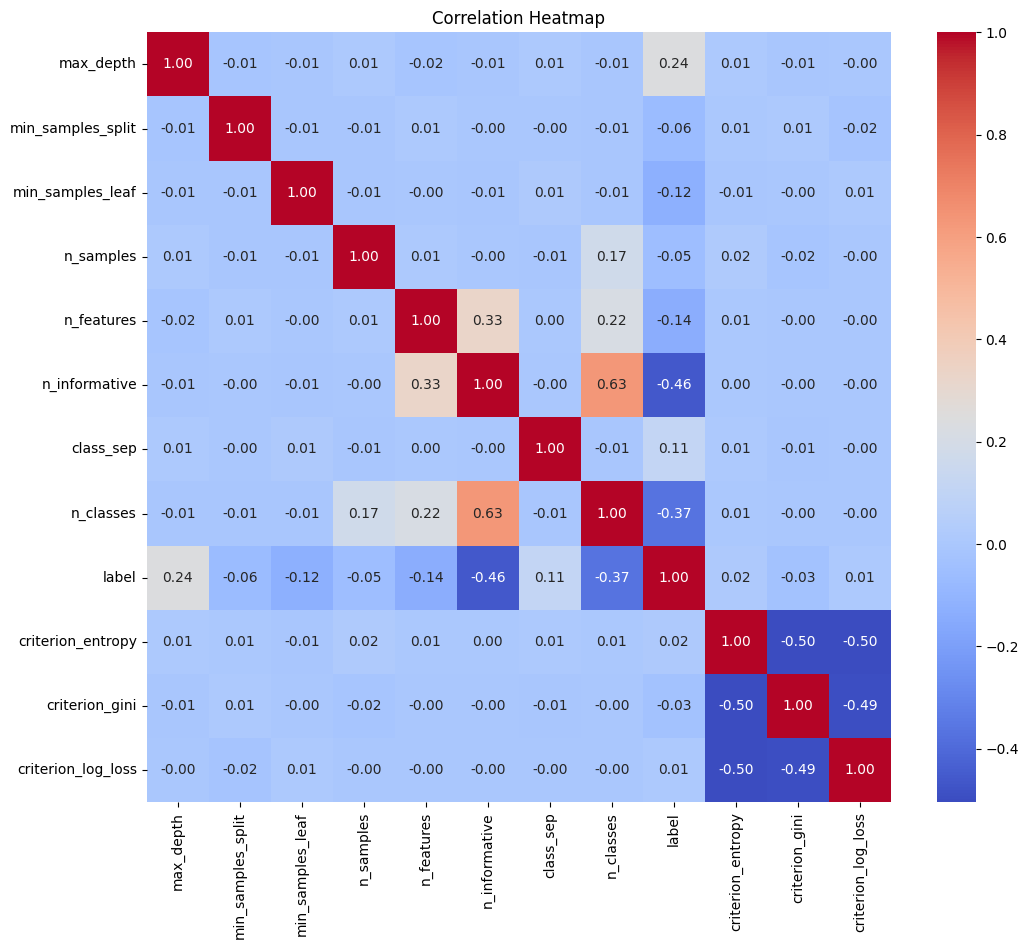

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\abhij\AppData\Local\Temp\ipykernel_18484\2765334105.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label", loc='upper right')


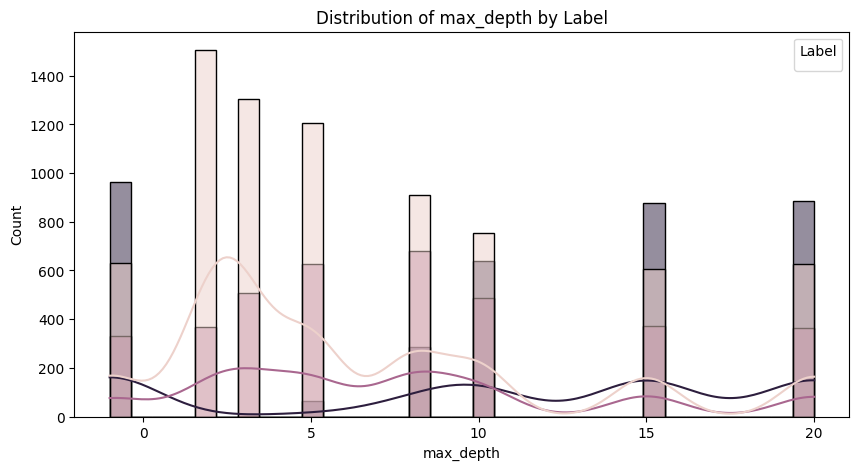

C:\Users\abhij\AppData\Local\Temp\ipykernel_18484\2765334105.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label", loc='upper right')


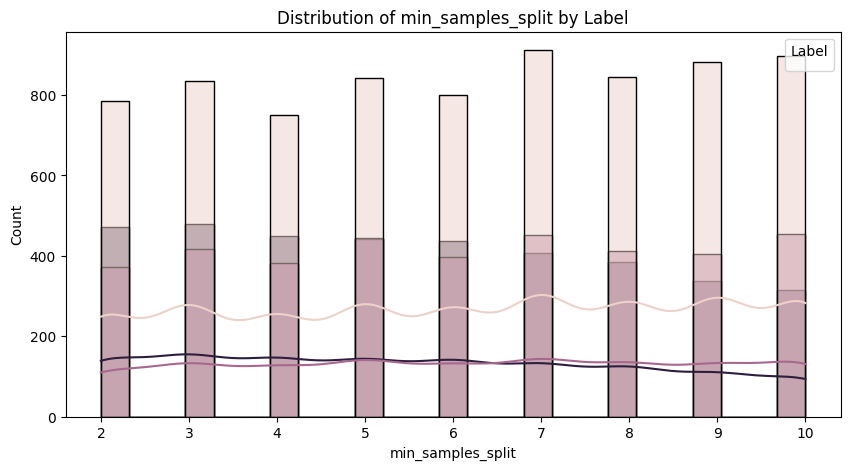

C:\Users\abhij\AppData\Local\Temp\ipykernel_18484\2765334105.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label", loc='upper right')


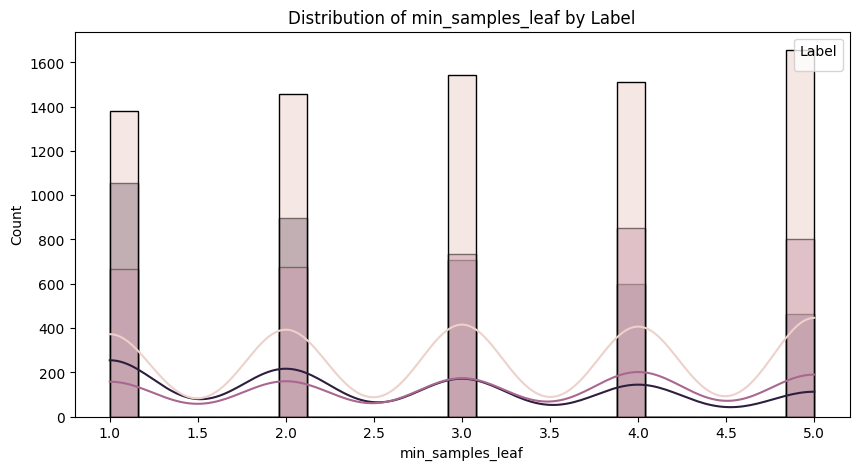

C:\Users\abhij\AppData\Local\Temp\ipykernel_18484\2765334105.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label", loc='upper right')


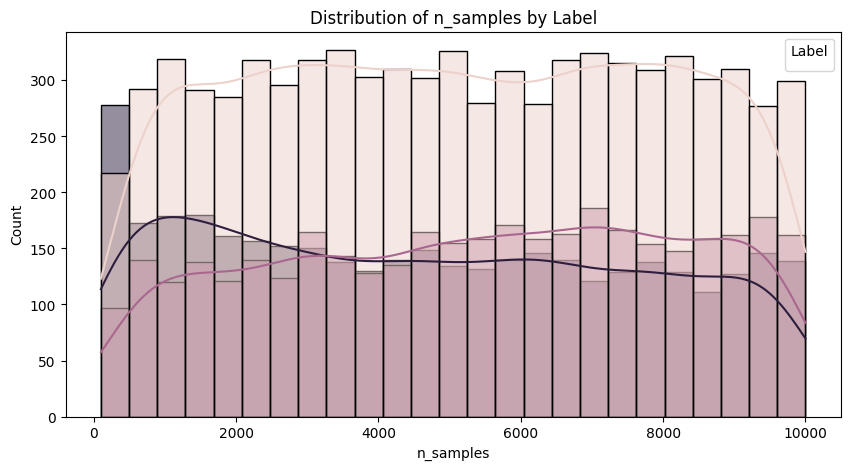

C:\Users\abhij\AppData\Local\Temp\ipykernel_18484\2765334105.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label", loc='upper right')


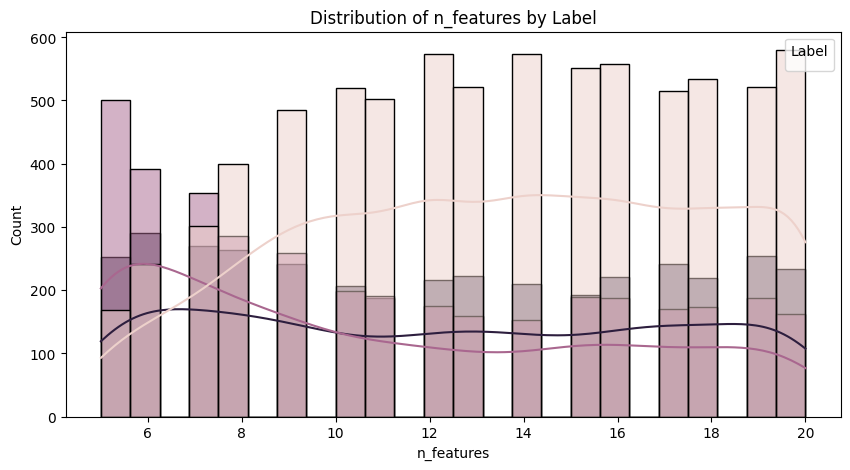

C:\Users\abhij\AppData\Local\Temp\ipykernel_18484\2765334105.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label", loc='upper right')


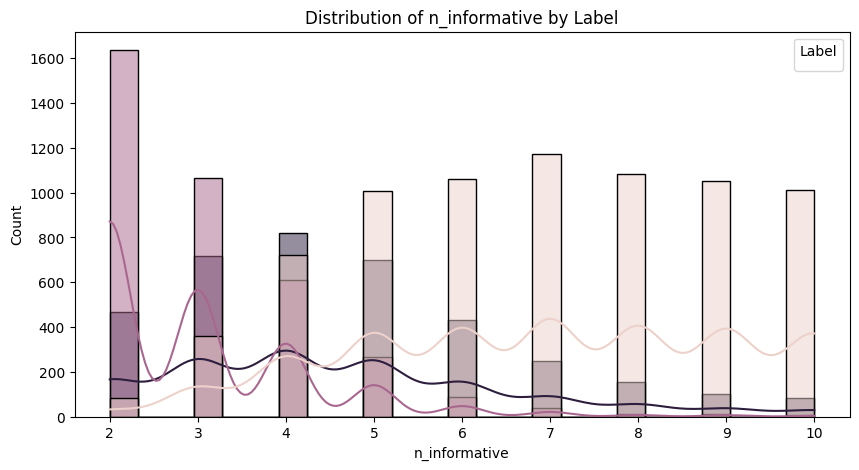

C:\Users\abhij\AppData\Local\Temp\ipykernel_18484\2765334105.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label", loc='upper right')


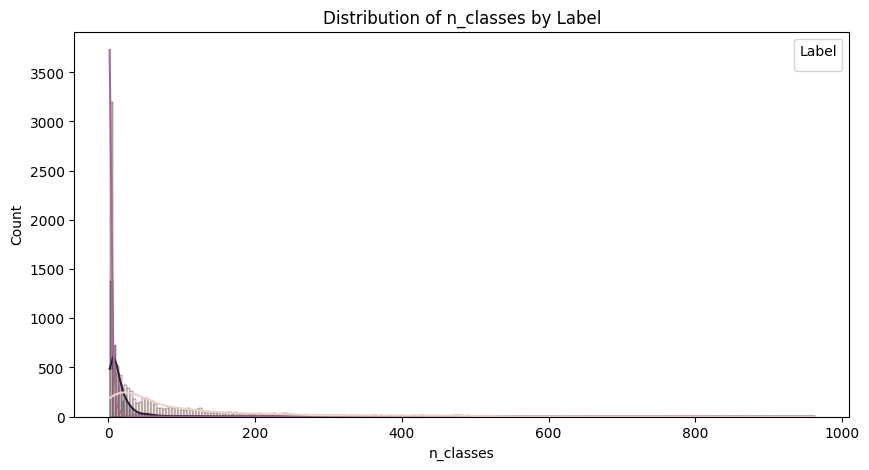

In [9]:
for column in df.select_dtypes("int64", "float64").drop(columns=["label"]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, hue="label", kde=True)
    plt.title(f"Distribution of {column} by Label")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Label", loc='upper right')
    plt.show()

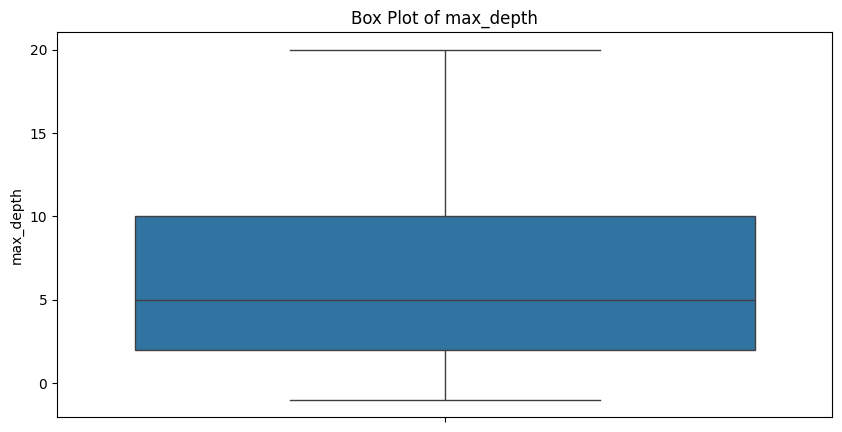

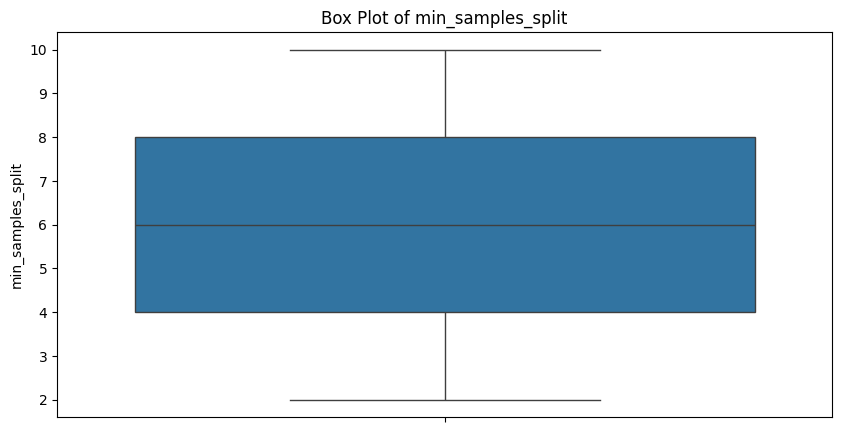

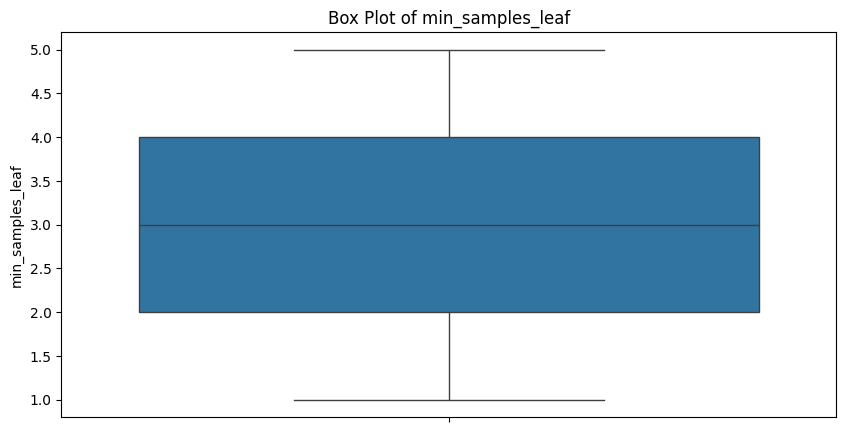

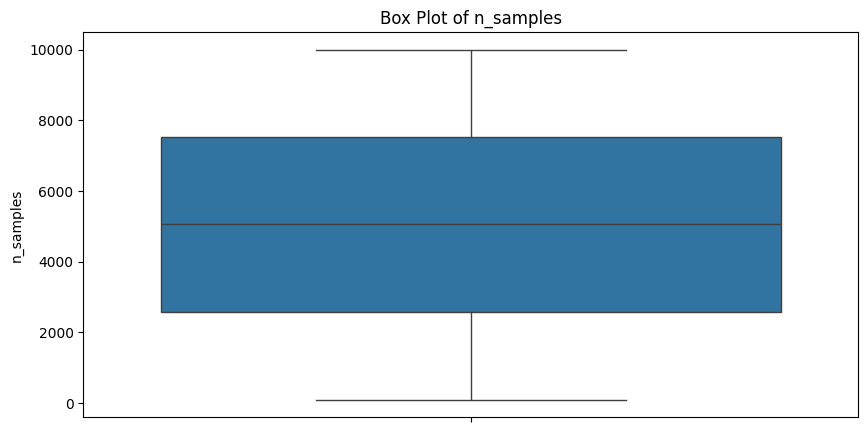

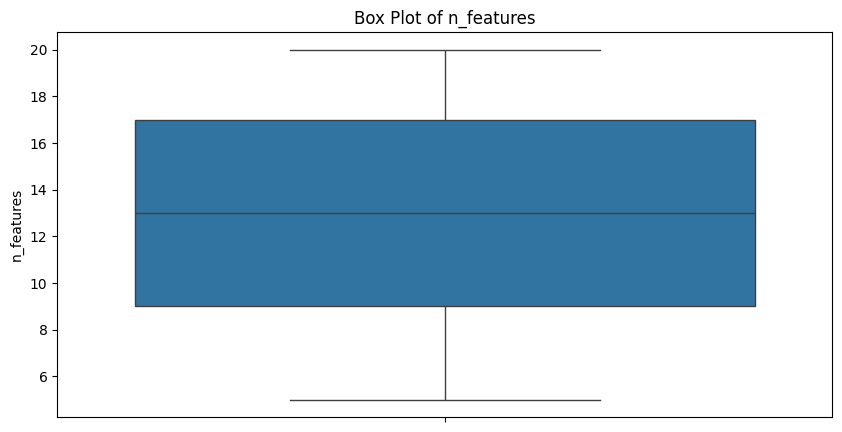

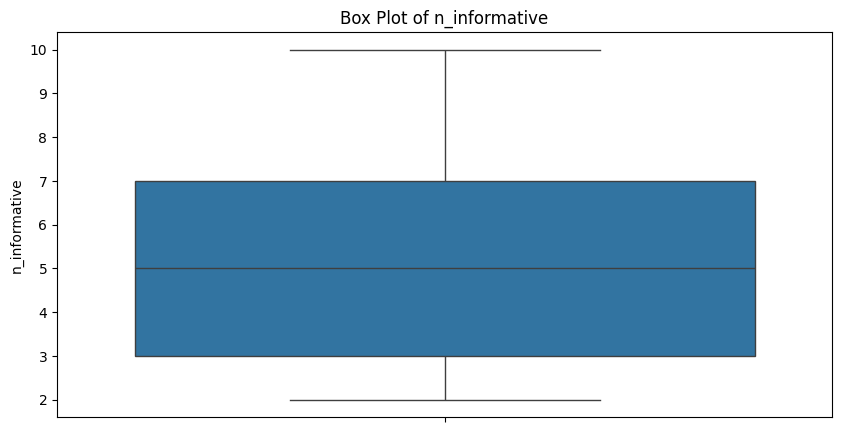

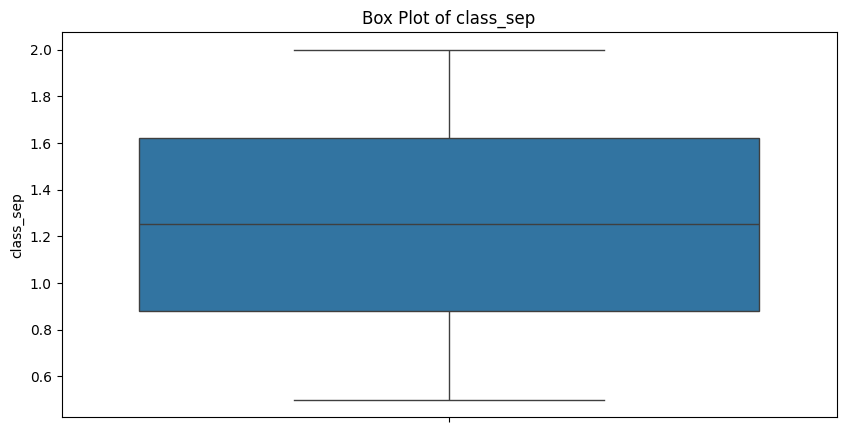

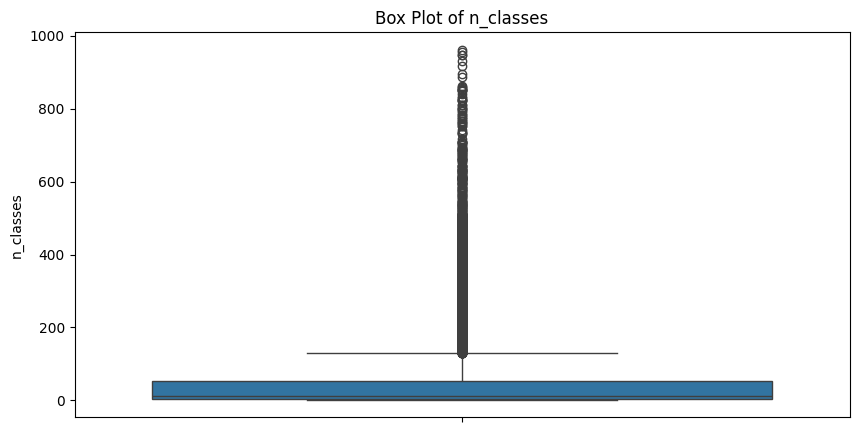

In [10]:
for column in df.select_dtypes(include = ["int64", "float64"]).drop(columns = ["label"]).columns:
    plt.figure(figsize = (10, 5))
    sns.boxplot(data = df, y = column)
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()

In [11]:
Q3 = df["n_classes"].quantile(0.75)
Q1 = df["n_classes"].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["n_classes"] = df["n_classes"].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [12]:
print(df["label"].value_counts())

label
0    7546
1    3735
2    3719
Name: count, dtype: int64


In [13]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state = 42)

X = df.drop(columns=["label"])
y = df["label"]
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

cols_to_scale = X.columns[:-3]

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state = 42, criterion = "entropy", n_estimators = 90, max_depth = 20)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1509
           1       0.90      0.93      0.91      1509
           2       0.91      0.87      0.89      1510

    accuracy                           0.92      4528
   macro avg       0.92      0.92      0.92      4528
weighted avg       0.92      0.92      0.92      4528



In [15]:
train_acc = rf.score(X_train_scaled, y_train)
test_acc = rf.score(X_test_scaled, y_test)
print(f"Random Forest Classifier - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

cross_score_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f"Random Forest Classifier - Cross-validation scores: {cross_score_rf}")
print(f"Random Forest Classifier - Mean Cross-validation score: {cross_score_rf.mean():.4f}")

Random Forest Classifier - Train Accuracy: 0.9999, Test Accuracy: 0.9167
Random Forest Classifier - Cross-validation scores: [0.90198785 0.90999448 0.90833793 0.90198785 0.91358366]
Random Forest Classifier - Mean Cross-validation score: 0.9072


In [16]:
svm = SVC(kernel = "rbf", random_state = 42, C = 10)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("Support Vector Machine Classifier Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Classifier Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1509
           1       0.86      0.91      0.89      1509
           2       0.89      0.84      0.87      1510

    accuracy                           0.90      4528
   macro avg       0.90      0.90      0.90      4528
weighted avg       0.90      0.90      0.90      4528



In [17]:
print(f"Testing Accuracy: {svm.score(X_test_scaled, y_test)}")
print(f"Training Accuracy: {svm.score(X_train_scaled, y_train)}")
print(f"Accuracy Difference: {svm.score(X_train_scaled, y_train) - svm.score(X_test_scaled, y_test)}")

Testing Accuracy: 0.8977473498233216
Training Accuracy: 0.9240198785201547
Accuracy Difference: 0.026272528696833053


In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter = 1200, penalty = "l2", solver = "newton-cholesky")
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Classifier Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1509
           1       0.81      0.89      0.85      1509
           2       0.75      0.68      0.71      1510

    accuracy                           0.80      4528
   macro avg       0.80      0.80      0.80      4528
weighted avg       0.80      0.80      0.80      4528



In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, criterion = "log_loss", max_depth = 12)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1509
           1       0.87      0.88      0.87      1509
           2       0.85      0.81      0.83      1510

    accuracy                           0.88      4528
   macro avg       0.87      0.88      0.88      4528
weighted avg       0.87      0.88      0.88      4528



In [20]:
dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)
print(f"Decision Tree Classifier - Train Accuracy: {dt_train_acc:.4f}, Test Accuracy: {dt_test_acc:.4f}")

Decision Tree Classifier - Train Accuracy: 0.9615, Test Accuracy: 0.8757


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 18, metric = "euclidean")
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("K-Nearest Neighbors Classifier Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1509
           1       0.77      0.85      0.80      1509
           2       0.80      0.69      0.74      1510

    accuracy                           0.80      4528
   macro avg       0.80      0.80      0.80      4528
weighted avg       0.80      0.80      0.80      4528



In [22]:
knn_train_acc = knn.score(X_train_scaled, y_train)
knn_test_acc = knn.score(X_test_scaled, y_test)
print(f"KNN Classifier - Train Accuracy: {knn_train_acc:.4f}, Test Accuracy: {knn_test_acc:.4f}")
cross_score_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"KNN Classifier - Cross-validation scores: {cross_score_knn}")
print(f"KNN Classifier - Mean Cross-validation score: {cross_score_knn.mean():.4f}")

KNN Classifier - Train Accuracy: 0.8267, Test Accuracy: 0.7992
KNN Classifier - Cross-validation scores: [0.78409718 0.79707344 0.78879072 0.78133628 0.80646052]
KNN Classifier - Mean Cross-validation score: 0.7916


In [23]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, alpha = 10, booster = "gbtree", eval_metric = "mlogloss", random_state = 42, n_estimators = 90, max_depth = 25)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))

c:\Users\abhij\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:53:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1509
           1       0.91      0.93      0.92      1509
           2       0.92      0.88      0.90      1510

    accuracy                           0.92      4528
   macro avg       0.92      0.92      0.92      4528
weighted avg       0.92      0.92      0.92      4528



In [24]:

xg_train_acc = xgb_clf.score(X_train, y_train)
xg_test_acc = xgb_clf.score(X_test, y_test)
print(f"XGBoost Classifier - Train Accuracy: {xg_train_acc:.4f}, Test Accuracy: {xg_test_acc:.4f}")
cross_score_xgb = cross_val_score(xgb_clf, X_train, y_train, cv=5)
print(f"XGBoost Classifier - Cross-validation scores: {cross_score_xgb}")
print(f"XGBoost Classifier - Mean Cross-validation score: {cross_score_xgb.mean():.4f}")


XGBoost Classifier - Train Accuracy: 0.9594, Test Accuracy: 0.9247


c:\Users\abhij\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:53:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhij\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:53:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhij\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:53:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\abhij\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:53:47] WARNING: C:\actio

XGBoost Classifier - Cross-validation scores: [0.9033683  0.91551629 0.90750966 0.9094423  0.91413584]
XGBoost Classifier - Mean Cross-validation score: 0.9100


In [26]:
results = {
    'Model': ["XGBoost", "RandomForest", "KNN", "DecisionTree", "LogisticRegression", "SVM"],
    'Accuracy': [0.92, 0.92, 0.80, 0.88, 0.80, 0.90]
}
df_results = pd.DataFrame(results) 

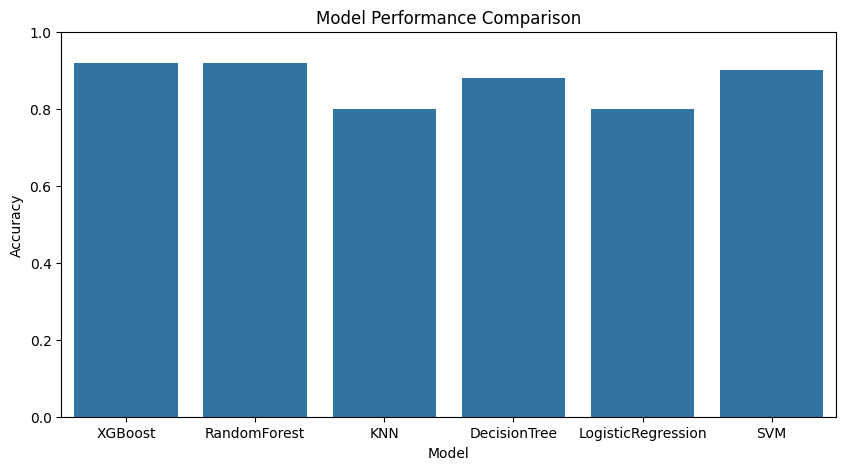

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_results, x = 'Model', y = 'Accuracy')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()